In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import *
from datetime import time, tzinfo, timedelta, datetime
%matplotlib inline

In [3]:
import xgboost as xgb
from sklearn.tree import export_graphviz
import graphviz,re

In [5]:
## From fastai library
def draw_tree(t, df, size=10, ratio=0.6, precision=1):
    """ Draws a representation of a random forest in IPython.

    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, special_characters=True, rotate=True, precision=precision)
    display(graphviz.Source(re.sub('Tree {',f, 'Tree {{ size={size}; ratio={ratio}', s)))

In [6]:
client = MongoClient('52.79.239.183', 27017)
print("DB connection complete!!")
DB_Coin = client["BINANCE"]
Collection = DB_Coin['BTC/USD_30MIN']
import time
DB_schema = []

for collect in Collection.find():    
    temp_record = {}

    temp_record['open'] = collect['price_open']
    temp_record['close'] = collect['price_close']
    temp_record['high'] = collect['price_high']
    temp_record['low'] = collect['price_low']
    temp_record['volume'] = collect['volume_traded']    
    temp_record['Date'] = collect['time_close']
    DB_schema.append(temp_record)
    del temp_record

DB connection complete!!


In [7]:
DF = pd.DataFrame(DB_schema)
DF['Date'] = DF['Date'].apply(pd.to_datetime, errors='coerce')
DF.index = DF['Date']
DF = DF.sort_values(by='Date')
DF = DF[['close', 'high', 'low', 'open', 'volume']]
split_idx = int(DF.shape[0]*0.6)
Train_DF = DF[:split_idx]
Test_DF = DF[split_idx:]

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


In [8]:
x_train = Train_DF.dropna().drop('close', axis=1)
y_train = Train_DF.dropna()[['close']]
x_test = Test_DF.dropna().drop('close', axis=1)
y_test = Test_DF.dropna()[['close']]

x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)
print(x_train.shape)
print(y_train.shape)

(10544, 4)
(10544, 1)


In [9]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [19]:
model = RandomForestRegressor(n_estimators=100,max_depth=20)
model.fit(x_train, y_train)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

[6391.23]
[6395.59167689]


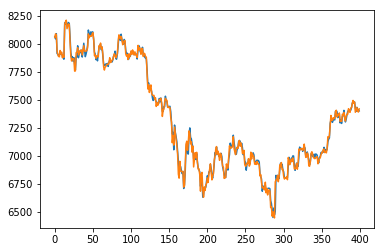

In [27]:
model_pred = model.predict(x_test).reshape(-1,1)
y_pred_rescaled = sc.inverse_transform(model_pred)
y_true_rescaled = sc.inverse_transform(y_test)
plt.plot(y_pred_rescaled[:400])
plt.plot(y_true_rescaled[:400])
print(y_true_rescaled[-1])
print(y_pred_rescaled[-1])

In [25]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')